In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly import express as px
import seaborn as sns

In [12]:
df = pd.read_excel('./Tecnicas-de-Programacao-II-Modulo-5/data/IT_Salary_Survey_EU_2020.xlsx')
df.head(3)

,Age,Gender,City,Position,Years of experience,Seniority level,Main technology,Other technologies,Yearly salary,Vacation days,Employment status,Ð¡ontract duration,Language at work,Company size,Company type
0,26,Male,Munich,Software Engineer,5,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,30.0,Full-time employee,Unlimited contract,English,51-100,Product
1,26,Male,Berlin,Backend Developer,7,Senior,Ruby,NaN,80000.0,28.0,Full-time employee,Unlimited contract,English,101-1000,Product
2,29,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,30.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product


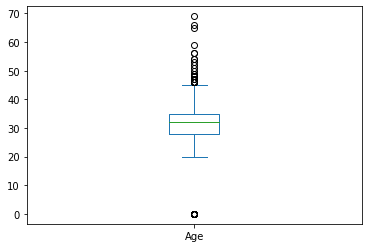

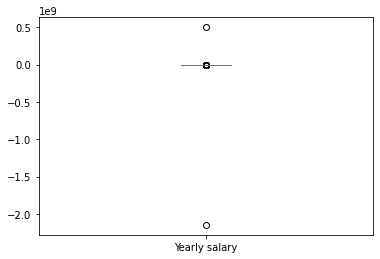

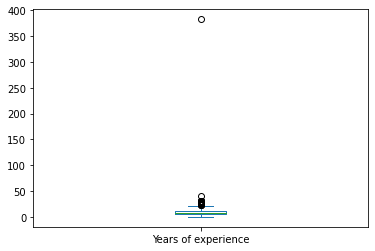

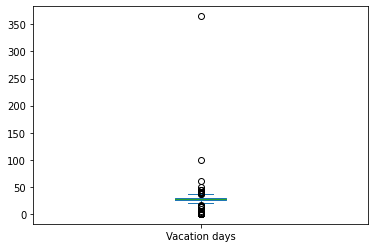

In [13]:
ax1 = df.plot(y='Age', kind='box')
ax2 = df.plot(y='Yearly salary', kind='box')
ax3 = df.plot(y='Years of experience', kind='box')
ax4 = df.plot(y='Vacation days', kind='box')

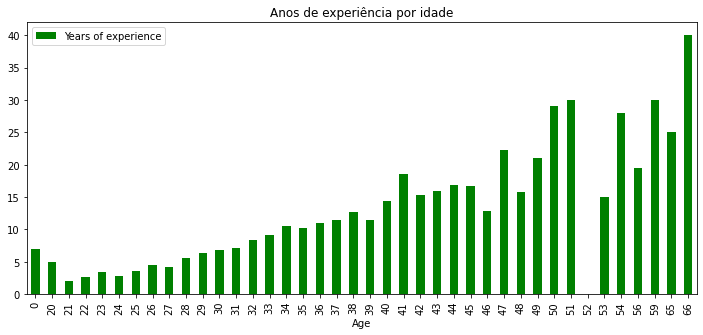

In [14]:
df1 = df[df['Years of experience'] < 100]
age_experience = df1.pivot_table(index='Age', values='Years of experience', aggfunc='mean')
age_experience.plot(kind='bar', figsize=(12,5), color='green', title = 'Anos de experiência por idade');

In [ ]:
pivot3 = pd.pivot_table(df, 
               index=['TIPO_DOADOR'], 
               # columns = ['situation'],
               values=['VR_RECEITA'], 
               aggfunc= [np.sum, np.mean, np.median, np.min, np.max, np.std],
               # margins=True,
               # margins_name='Total',
               fill_value=0)

pivot3

,sum,mean,median,amin,amax,std
,VR_RECEITA,VR_RECEITA,VR_RECEITA,VR_RECEITA,VR_RECEITA,VR_RECEITA
TIPO_DOADOR,,,,,,
fisica,12139144,1864.978338,600,0,200000,6549.360493
juridica,368049900,63687.471881,1500,0,11900000,308559.420417


In [15]:
pivot_teste = df1.pivot_table(index='Employment status', columns='Gender', values='Yearly salary', aggfunc='mean')
pivot_teste

Gender,Diverse,Female,Male
Employment status,,,
Company Director,NaN,NaN,110000.000000
Founder,NaN,NaN,75000.000000
Full-time employee,144500.0,2.821332e+06,73385.571000
"Full-time position, part-time position, & self-employed (freelancing, tutoring)",NaN,NaN,54179.000000
Intern,NaN,NaN,35000.000000
Part-time employee,NaN,5.596400e+04,28388.333333
Self-employed (freelancer),NaN,4.000000e+04,108422.259259
Werkstudent,NaN,NaN,11500.000000
Working Student,NaN,NaN,14400.000000


---  
### pivot table com formatação condicional  
fonte:  
https://datagy.io/pandas-style/  
https://mode.com/example-gallery/python_dataframe_styling/

In [16]:
def highlight_rule(val):
    color = 'gray' if val > 50000 else 'white'
    return 'color: %s' % color

In [17]:
pivot_highlight = pivot_teste.style.applymap(highlight_rule)
pivot_highlight

Gender,Diverse,Female,Male
Employment status,,,
Company Director,nan,nan,110000.000000
Founder,nan,nan,75000.000000
Full-time employee,144500.000000,2821332.099448,73385.571000
"Full-time position, part-time position, & self-employed (freelancing, tutoring)",nan,nan,54179.000000
Intern,nan,nan,35000.000000
Part-time employee,nan,55964.000000,28388.333333
Self-employed (freelancer),nan,40000.000000,108422.259259
Werkstudent,nan,nan,11500.000000
Working Student,nan,nan,14400.000000


In [18]:
pivot_highlight = pivot_teste.style.applymap(highlight_rule).format('${0:,.0f}')
pivot_highlight

Gender,Diverse,Female,Male
Employment status,,,
Company Director,$nan,$nan,"$110,000"
Founder,$nan,$nan,"$75,000"
Full-time employee,"$144,500","$2,821,332","$73,386"
"Full-time position, part-time position, & self-employed (freelancing, tutoring)",$nan,$nan,"$54,179"
Intern,$nan,$nan,"$35,000"
Part-time employee,$nan,"$55,964","$28,388"
Self-employed (freelancer),$nan,"$40,000","$108,422"
Werkstudent,$nan,$nan,"$11,500"
Working Student,$nan,$nan,"$14,400"


In [19]:
pivot_highlight = pivot_teste.style.format('${0:,.0f}')\
   .highlight_max(color='green')\
   .highlight_min(color='red')

pivot_highlight

Gender,Diverse,Female,Male
Employment status,,,
Company Director,$nan,$nan,"$110,000"
Founder,$nan,$nan,"$75,000"
Full-time employee,"$144,500","$2,821,332","$73,386"
"Full-time position, part-time position, & self-employed (freelancing, tutoring)",$nan,$nan,"$54,179"
Intern,$nan,$nan,"$35,000"
Part-time employee,$nan,"$55,964","$28,388"
Self-employed (freelancer),$nan,"$40,000","$108,422"
Werkstudent,$nan,$nan,"$11,500"
Working Student,$nan,$nan,"$14,400"


In [20]:
pivot_teste.style.background_gradient(cmap='Greens').format('${0:,.0f}')

Gender,Diverse,Female,Male
Employment status,,,
Company Director,$nan,$nan,"$110,000"
Founder,$nan,$nan,"$75,000"
Full-time employee,"$144,500","$2,821,332","$73,386"
"Full-time position, part-time position, & self-employed (freelancing, tutoring)",$nan,$nan,"$54,179"
Intern,$nan,$nan,"$35,000"
Part-time employee,$nan,"$55,964","$28,388"
Self-employed (freelancer),$nan,"$40,000","$108,422"
Werkstudent,$nan,$nan,"$11,500"
Working Student,$nan,$nan,"$14,400"


In [21]:
pivot_teste.style.background_gradient(subset=['Male'], cmap='Greens').format('${0:,.0f}')

Gender,Diverse,Female,Male
Employment status,,,
Company Director,$nan,$nan,"$110,000"
Founder,$nan,$nan,"$75,000"
Full-time employee,"$144,500","$2,821,332","$73,386"
"Full-time position, part-time position, & self-employed (freelancing, tutoring)",$nan,$nan,"$54,179"
Intern,$nan,$nan,"$35,000"
Part-time employee,$nan,"$55,964","$28,388"
Self-employed (freelancer),$nan,"$40,000","$108,422"
Werkstudent,$nan,$nan,"$11,500"
Working Student,$nan,$nan,"$14,400"


In [22]:
pivot_teste.style.format('${0:,.0f}').bar(subset=['Male'], color='Green')

Gender,Diverse,Female,Male
Employment status,,,
Company Director,$nan,$nan,"$110,000"
Founder,$nan,$nan,"$75,000"
Full-time employee,"$144,500","$2,821,332","$73,386"
"Full-time position, part-time position, & self-employed (freelancing, tutoring)",$nan,$nan,"$54,179"
Intern,$nan,$nan,"$35,000"
Part-time employee,$nan,"$55,964","$28,388"
Self-employed (freelancer),$nan,"$40,000","$108,422"
Werkstudent,$nan,$nan,"$11,500"
Working Student,$nan,$nan,"$14,400"


In [ ]:
# https://www.geeksforgeeks.org/set-pandas-dataframe-background-color-and-font-color-in-python/
# https://towardsdatascience.com/essential-techniques-to-style-pandas-dataframes-8796c74c9ff3

---  
### seaborn and charts exploration

In [23]:
df_size = pd.read_csv('./Tecnicas-de-Programacao-II-Modulo-5/data/penguins_size.csv')
df_size.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [24]:
df_size.dropna(inplace=True)
df_size = df_size[ df_size['sex']!='.']

In [25]:
df_size.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


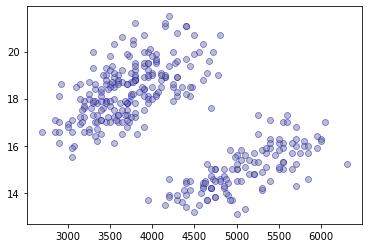

In [26]:
plt.scatter(data=df_size, x='body_mass_g', y='culmen_depth_mm', 
            marker='o', edgecolors='blue', c='gray', linewidths=0.8, alpha=0.5, );

In [27]:
from sklearn import preprocessing

In [28]:
# transformando categorias em números, para conseguir separar as cores por uma categoria
# (no seaborn é mais fácil, utilizando o hue)
le = preprocessing.LabelEncoder()
df_size['sex_encoded'] = le.fit_transform(df_size['sex'])
df_size['island_encoded'] = le.fit_transform(df_size['island'])

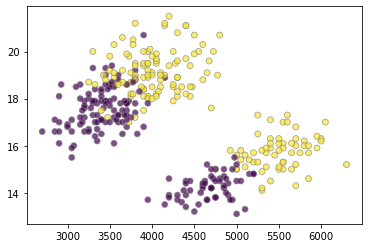

In [29]:
plt.scatter(data=df_size, x='body_mass_g', y='culmen_depth_mm', 
            marker='o', edgecolors='gray', c='sex_encoded', linewidths=0.8, alpha=0.7);

[Text(0.5, 172.25454545454548, 'culmen depth')]

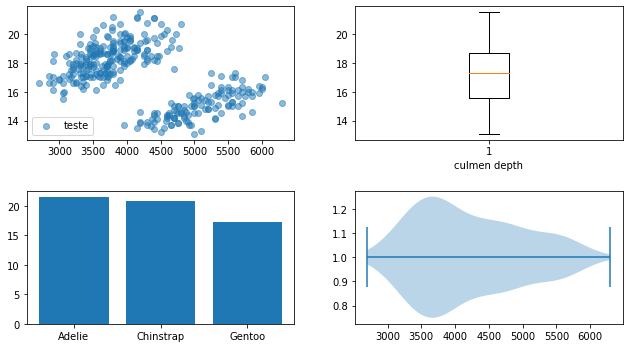

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(9,5))
fig.tight_layout(h_pad=3, w_pad=3)

axs[0, 0].scatter(data=df_size, x='body_mass_g', y='culmen_depth_mm', label='teste', alpha=0.5)
axs[0, 1].boxplot(data=df_size, x='culmen_depth_mm')
axs[1, 0].bar(data=df_size, x='species', height='culmen_depth_mm')
axs[1, 1].violinplot(data=df_size, dataset='body_mass_g', vert=False)

axs[0, 0].legend(loc='lower left')
axs[0, 1].set(xlabel='culmen depth')

In [31]:
fig = px.scatter(data_frame=df_size, x='body_mass_g', y='culmen_depth_mm', color='species')

fig.update_layout(
    xaxis_title='body mass',
    yaxis_title='culmen depth',
    legend_title='Species',
    legend_title_font_color='gray',
    font_color='gray',
    width=700, height=400,
    title={
        'text':'Massa pela altura'.upper(), 
        'x':0.075, 'y':0.92,
        'font_family':'Arial',
        'font_color':'gray'}
)

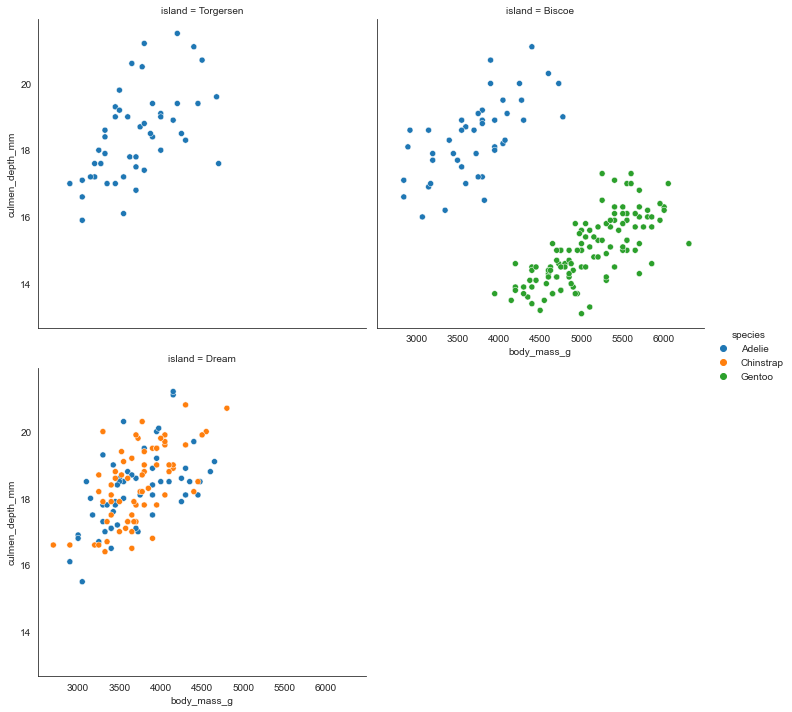

In [32]:
sns.set_style("white")
sns.relplot(kind='scatter', data=df_size, x='body_mass_g', y='culmen_depth_mm', hue='species', col='island', col_wrap=2);

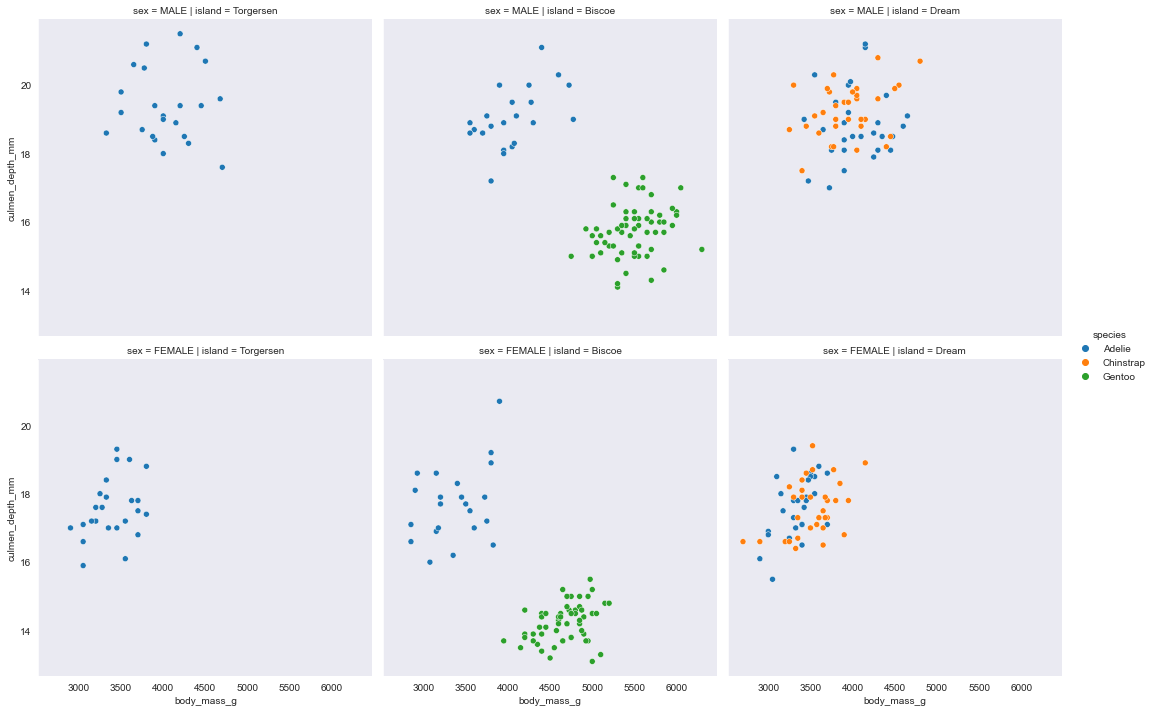

In [33]:
sns.set_style("dark")
sns.relplot(kind='scatter', data=df_size, x='body_mass_g', y='culmen_depth_mm', 
            hue='species', col='island', row='sex');

In [34]:
df_market = pd.read_csv('./Tecnicas-de-Programacao-II-Modulo-5/data/supermarket_sales.csv')
df_market.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [35]:
df_market['Date'] = pd.to_datetime(df_market['Date'])
df_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [36]:
df_payment=df_market.pivot_table(index='Date', columns='Payment', values='Total', aggfunc='sum')
#df_payment=df_market.pivot_table(index='Date', values='Total', aggfunc='sum')
px.line(df_payment)

In [37]:
df_payment=df_market.pivot_table(index='Date', columns='Payment', values='Total', aggfunc='sum')
px.line(df_payment, facet_col='Payment')

In [38]:
df_size.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'sex_encoded',
       'island_encoded'],
      dtype='object')

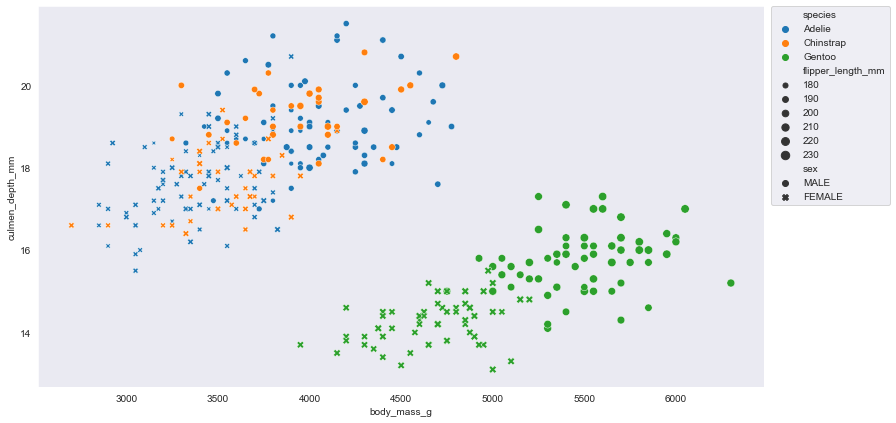

In [39]:
plt.figure(figsize=(13,7))
sns.scatterplot(data=df_size, x='body_mass_g', y='culmen_depth_mm', 
                hue='species', style='sex', size='flipper_length_mm')

plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.);

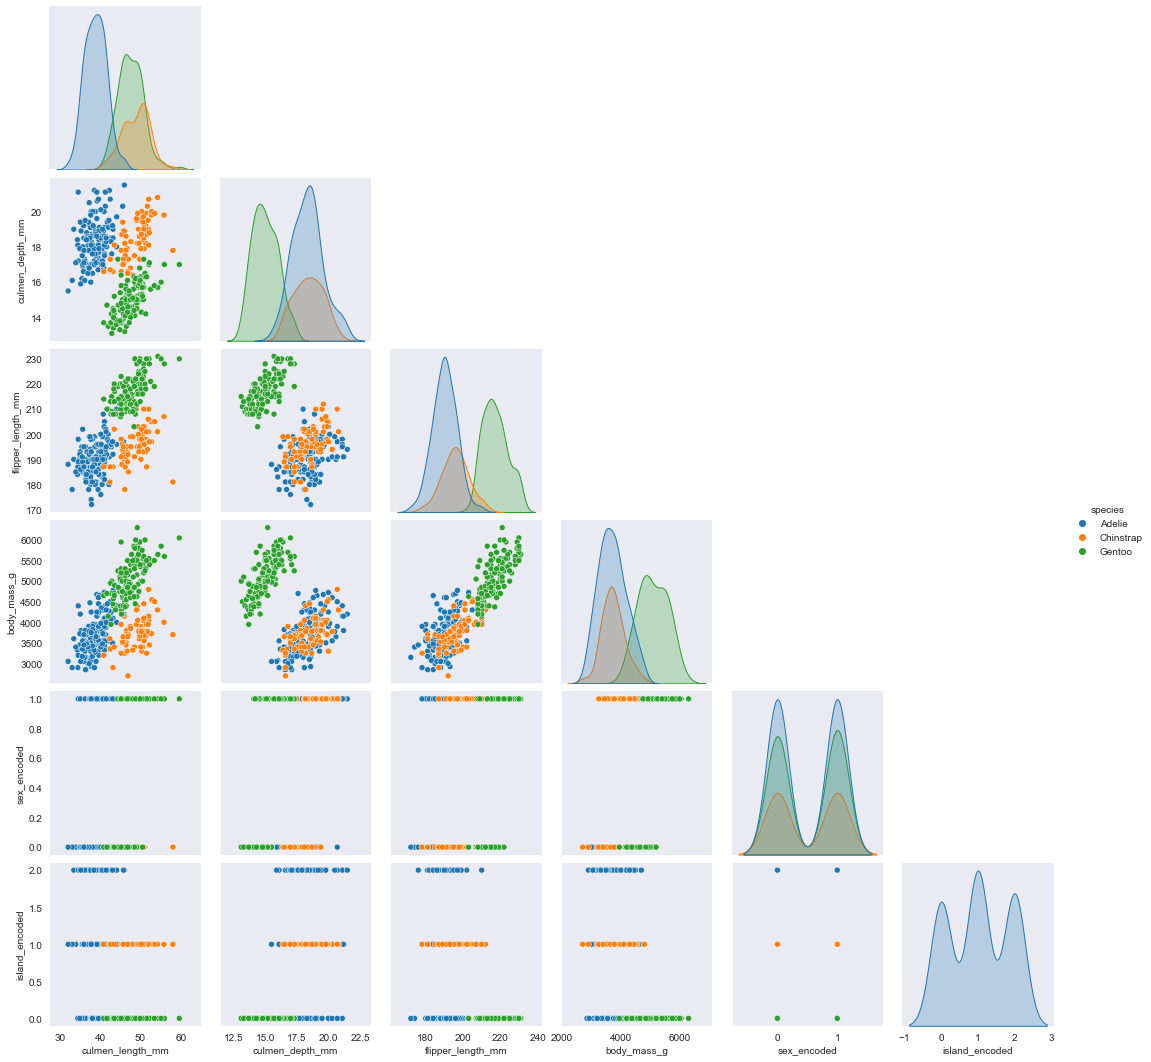

In [40]:
sns.pairplot(df_size, hue='species', corner=True);

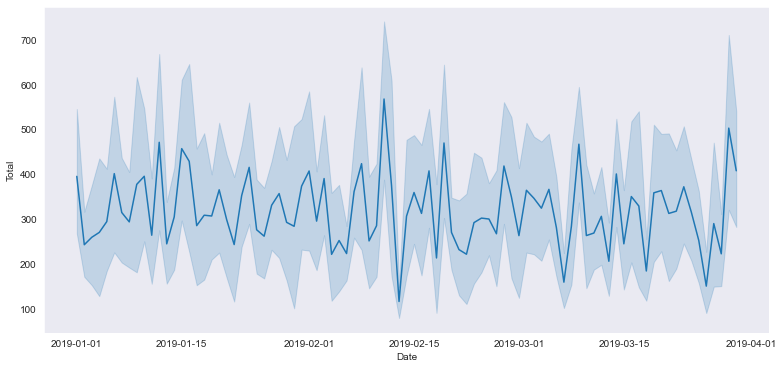

In [41]:
plt.figure(figsize=(13,6))
sns.lineplot(data=df_market, x='Date', y='Total');

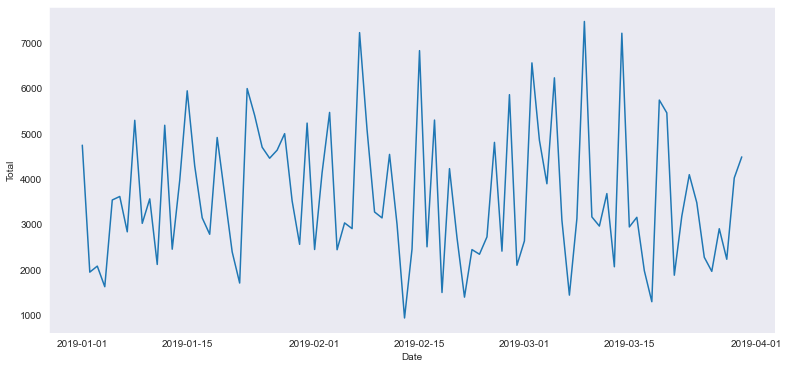

In [42]:
temp = df_market.pivot_table(index='Date', values='Total', aggfunc='sum')

plt.figure(figsize=(13,6))
sns.lineplot(data=temp, x='Date', y='Total');

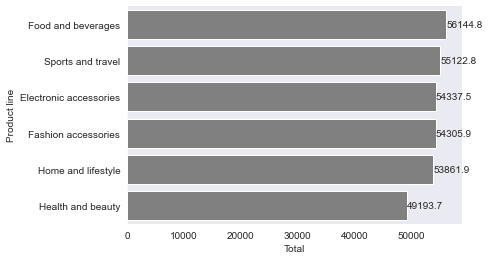

In [43]:
temp = df_market.pivot_table(index='Product line', values='Total', aggfunc='sum').reset_index().sort_values(by='Total', ascending=False)

ax = sns.barplot(data=temp, y='Product line', x='Total', ci=None, color='gray')
ax.bar_label(ax.containers[0])
sns.despine(bottom = True, left = False);

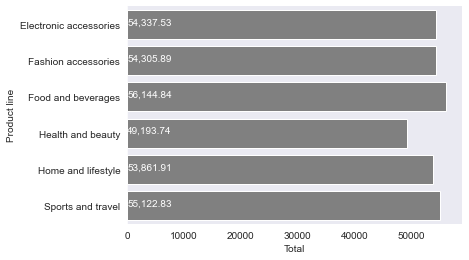

In [44]:
temp = df_market.pivot_table(index='Product line', values='Total', aggfunc='sum').reset_index()

ax = sns.barplot(data=temp, y='Product line', x='Total', ci=None, color='gray')
sns.despine(bottom = True, left = False)

for idx, row in temp.iterrows():
    ax.text(row.name, idx, f'{row.Total:,.2f}', color='white', ha='left')

In [45]:
df_heart = pd.read_csv('./Tecnicas-de-Programacao-II-Modulo-5/data/heart.csv')
df_heart.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [46]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [47]:
target = 'output'
vars_categ = ['sex', 'exng', 'cp', 'caa', 'fbs', 'restecg', 'slp', 'thall']
vars_cont = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

df_heart['sex'] = df_heart['sex'].astype(str)
df_heart['thall'] = df_heart['thall'].astype(str)
df_heart['cp'] = df_heart['cp'].astype(str)

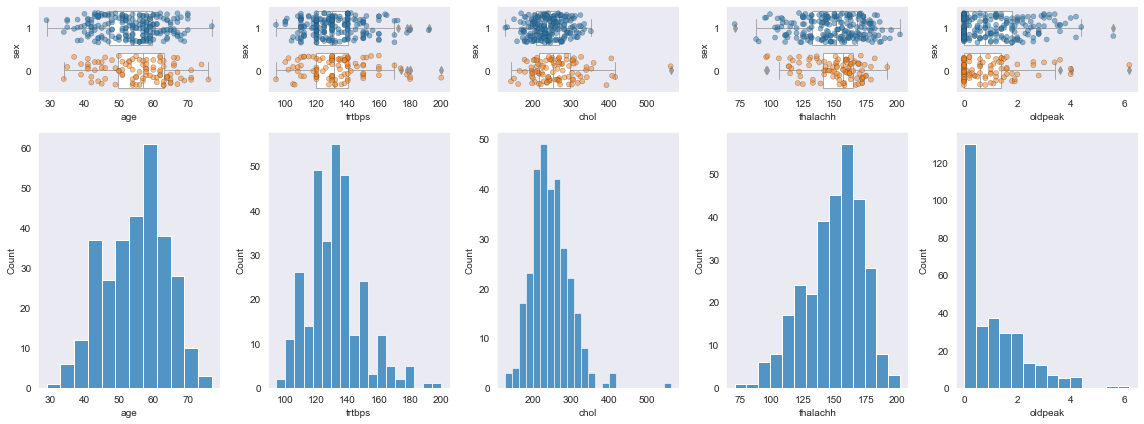

In [48]:
col=5
lin=round(len(vars_cont)/col)+1

f, (axes_box, axes_hist) = plt.subplots(lin, col, figsize=(16,6), sharex=False, gridspec_kw={"height_ratios": (.25, .75)} )
y=0

for i, name in enumerate(vars_cont):
    i, j = divmod(y, col)
    sns.boxplot(data=df_heart, x=name, y='sex', color='white',  linewidth=0.8, ax=axes_box[j] )
    sns.stripplot(data=df_heart, x=name, y='sex', linewidth=0.5, alpha=0.5, jitter=0.35, ax=axes_box[j] )
    sns.histplot(data=df_heart, x=name, edgecolor='white', ax=axes_hist[j] )
    y+=1

plt.tight_layout()
plt.show()

---  
### tornado chart example

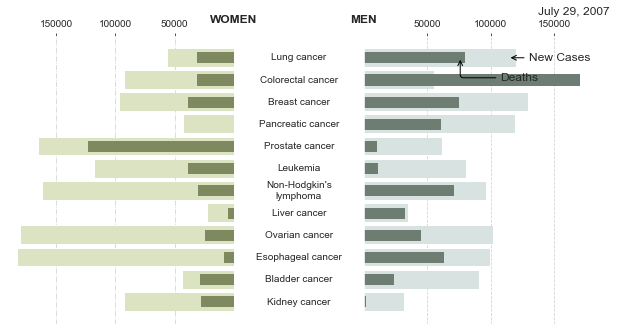

In [123]:
# https://discourse.matplotlib.org/t/tornado-chart/17058/4

cancers = [
    'Kidney cancer',
    'Bladder cancer',
    'Esophageal cancer',
    'Ovarian cancer',
    'Liver cancer',
    "Non-Hodgkin's\nlymphoma",
    'Leukemia',
    'Prostate cancer',
    'Pancreatic cancer',
    'Breast cancer',
    'Colorectal cancer',
    'Lung cancer',
    ]

num_cancers = len(cancers)

# generate some random data for the graphs (TODO; put real data here)
new_cases_men = np.random.uniform(low=20e3, high=200e3, size=num_cancers)
new_cases_women = np.random.uniform(low=20e3, high=200e3, size=num_cancers)
deaths_women = np.random.rand(num_cancers)*new_cases_women
deaths_men = np.random.rand(num_cancers)*new_cases_men

# force these values where the labels happen to make sure they are
# positioned nicely
new_cases_men[-1] = 120e3
new_cases_men[-2] = 55e3
deaths_men[-1] = 80e3

# bars centered on the y axis
pos = np.arange(num_cancers) + .5

# make the left and right axes for women and men
fig = plt.figure(facecolor='white', edgecolor='none', figsize=(9,5))
ax_women = fig.add_axes([0.05, 0.1, 0.35, 0.8])
ax_men = fig.add_axes([0.6, 0.1, 0.35, 0.8])

ax_men.set_xticks(np.arange(50e3, 201e3, 50e3))
ax_women.set_xticks(np.arange(50e3, 201e3, 50e3))

ax_women.set_facecolor('white')
ax_men.set_facecolor('white')

ax_men.xaxis.grid(linestyle='--', color='lightgray')
ax_women.xaxis.grid(linestyle='-.', color='lightgray')  # solid = '-' ; dotted = ':' ; dashed = '--' ; dashdot = '-.'

# just tick on the top
ax_women.xaxis.set_ticks_position('top')
ax_men.xaxis.set_ticks_position('top')

# make the women's graphs
ax_women.barh(pos, new_cases_women, align='center', facecolor='#DBE3C2', edgecolor='None')
ax_women.barh(pos, deaths_women, align='center', facecolor='#7E895F', height=0.5, edgecolor='None')
ax_women.set_yticks([])
ax_women.invert_xaxis()   # << pulo do gato está aqui

# make the men's graphs
ax_men.barh(pos, new_cases_men, align='center', facecolor='#D8E2E1', edgecolor='None')
ax_men.barh(pos, deaths_men, align='center', facecolor='#6D7D72', height=0.5, edgecolor='None')
ax_men.set_yticks([])

# the axes titles are in axes coords, so x=0, y=1.025 is on the left
# side of the axes, just above, x=1.0, y=1.025 is the right side of the
# axes, just above
ax_men.set_title('MEN', x=0.0, y=1.025, fontsize=12, fontweight="bold")
ax_women.set_title('WOMEN', x=1.0, y=1.025, fontsize=12, fontweight="bold")

# we want the cancer labels to be centered in the fig coord system and
# centered w/ respect to the bars so we use a custom transform
import matplotlib.transforms as transforms
transform = transforms.blended_transform_factory(fig.transFigure, ax_men.transData)
for i, label in enumerate(cancers):
    ax_men.text(0.5, i+0.5, label, ha='center', va='center', transform=transform)

# the fig suptile is in fig coords, so 0.98 is the far right; we right align the text
fig.suptitle('July 29, 2007', x=0.98, ha='right')

# now add the annotations
ax_men.annotate('New Cases', xy=(0.95*new_cases_men[-1], num_cancers-0.5),
                xycoords='data',
                xytext=(20, 0), textcoords='offset points',
                size=12,
                va='center',
                arrowprops=dict(arrowstyle="->",
                                color='black')
                )

# a curved arrow for the deaths annotation
ax_men.annotate('Deaths', xy=(0.95*deaths_men[-1], num_cancers-0.5),
                xycoords='data',
                xytext=(40, -20), textcoords='offset points',
                size=12,
                va='center',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="angle,angleA=0,angleB=90,rad=3",
                                color='black')
                )

plt.show()

---  
### sankey chart with holoviews

In [ ]:
import holoviews as hv

In [ ]:
pivot20 = pd.pivot_table(df1, 
               index=['txtDescricao', 'txtCNPJCPF'], 
               #columns = ['datEmissao_weekend'],
               values=["vlrDocumento"], 
               aggfunc= ['sum'],
               # margins=True,
               # margins_name='Total',
               fill_value=0)

df_rel2 = pd.DataFrame(pivot20.to_records())
df_rel2.rename(columns = {"('sum', 'vlrDocumento')":"vlrDocumento"}, inplace=True)
df_rel2 = df_rel2.sort_values(by='vlrDocumento', ascending=False).head(100)

In [ ]:
sankey2 = hv.Sankey(df_rel2, kdims=['txtDescricao', 'txtCNPJCPF'], vdims=["vlrDocumento"])

sankey2.opts(cmap='Colorblind',label_position='left',
                                 edge_color='txtDescricao', edge_line_width=0,
                                 node_alpha=1.0, node_width=40, node_sort=True,
                                 width=800, height=600, bgcolor="snow",
                                 title="Relação: Despesas > CNPJs")

:Sankey   [txtDescricao,txtCNPJCPF]   (vlrDocumento)